In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Jupyter=True, MatPlotLib.isinteractive()=False
Unique ID: ZmqNgojcSiC5vyYeCgKJhA
PlotVideoMaker: Hyper-Training, auto-save=True
middle-C=261.63 Hz
PlotVideoMaker: STFT_Video, auto-save=True
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1024 samples, duration=1.9 sec = 83 time steps
Max frequency=22050 Hz --> freq_buckets=1025
STFT file already created: {stft_file}
1 sample = 1,025 x 83 = 85,075


In [3]:
# Read all available samples and convert to STFTs
# This is performed automatically in the back-ground, but you can force it manually here with plots of the rejected audio files.
#make_STFTs(True)

#test_stft_conversions("Samples/Piano C4 Major 13 - 44.1 kHz.wav")
#stop()

In [4]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"
#model = "RNN_VAE"
model = "RNN_VAE_Incremental"

#model = "StepWiseMLP"
#model = "MLP_VAE"
#model = "MLPVAE_Incremental"

#model = "RNN_F&T"

#model = "STFT_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
#train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


RNN_VAE_Incremental: stored params=[0, -6, 6, 2, 0.5208515026679695]
RNNAutoEncoder: stored params=[5, -6, 50, 2, 2]
rnn_params=[50, 2, 2]
model_params=[6, 2, 0.5208515026679695]
combined=[50, 2, 2, 6, 2, 0.5208515026679695]
RNN_VAE_Incremental hidden=50, encode_depth=2, decode_depth=2, latent=6, VAE depth=2, VAE ratio=0.52
VAE layers=[4150, 1261, 6]
RNN=3,266,175, VAE=10,495,682, approx total=13,761,857
RNNAutoEncoder 3,266,175 parameters, compression=20.5
VariationalAutoEncoder: layers=[4150, 1261, 6], parameters=10,495,682, compression=691.7
CombinedVAE 13,761,857 parameters, compression=691.7
RNNAutoEncoder: loading weights & biases from file 'Models/RNNAutoEncoder.wab'
Freezing model RNNAutoEncoder
model=CombinedVAE(
  (auto_encoder): RNNAutoEncoder(
    (encoder): RNN(1025, 50, num_layers=2, batch_first=True)
    (decoder): RNN(50, 1025, num_layers=2, batch_first=True)
  )
  (vae): VariationalAutoEncoder(
    (encoder_layers): Sequential(
      (0): Linear(in_features=4150, out_f

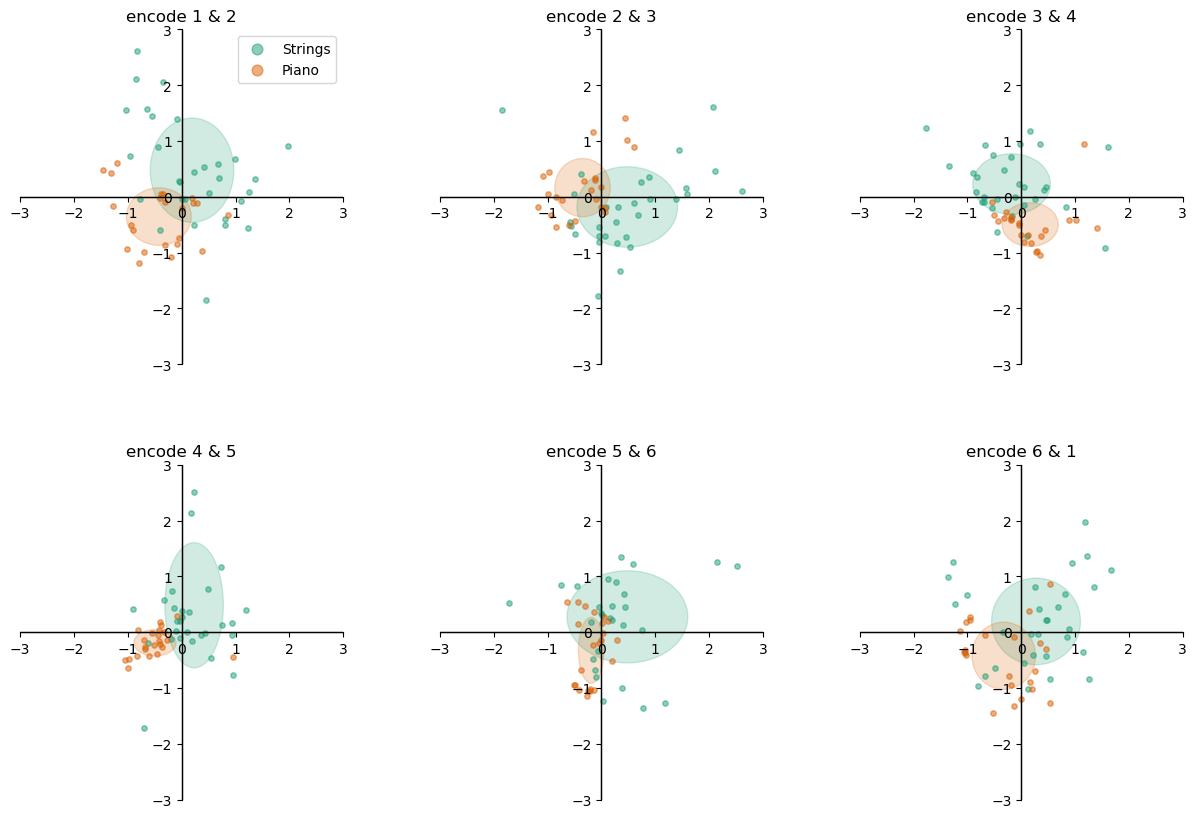

Encoded samples:
  29 x Pad
  49 x Plucked


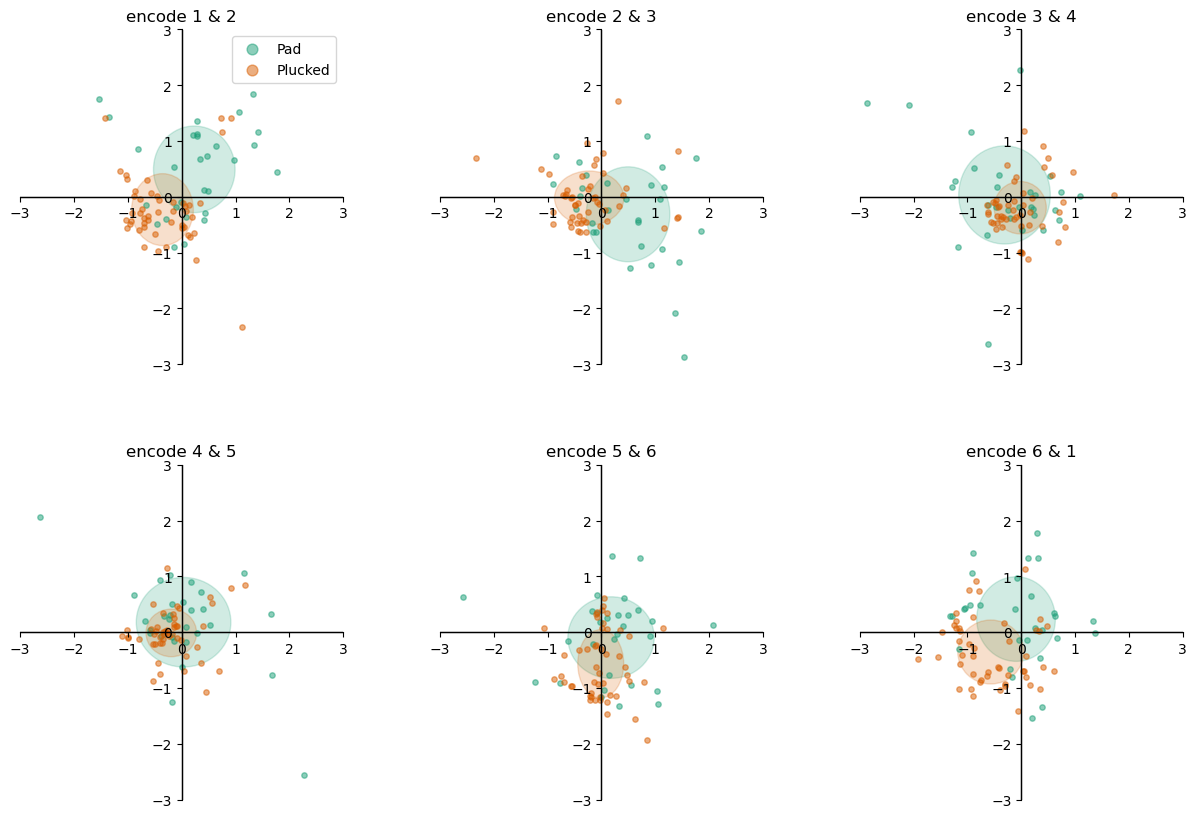

Encoded samples:
 231 x Vocal
 127 x Guitar


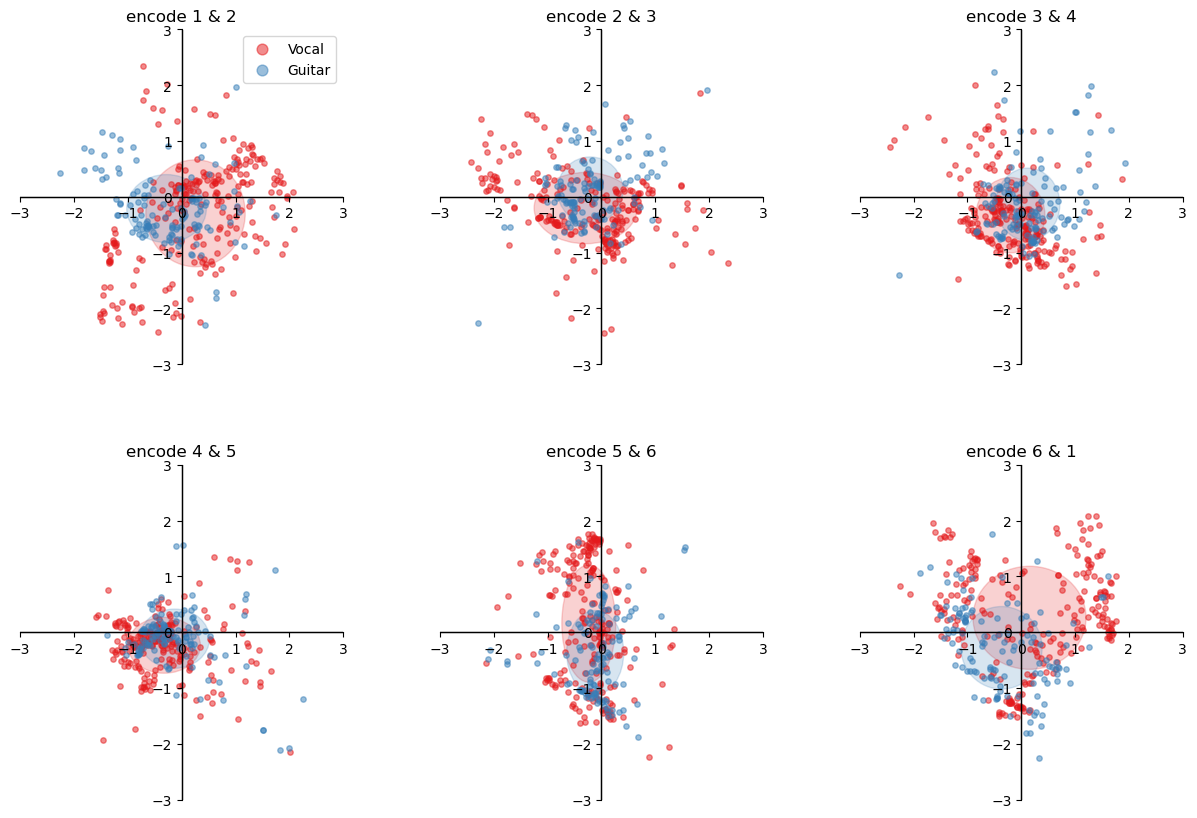

Encoded samples:
 231 x Vocal
  23 x Piano
 127 x Guitar


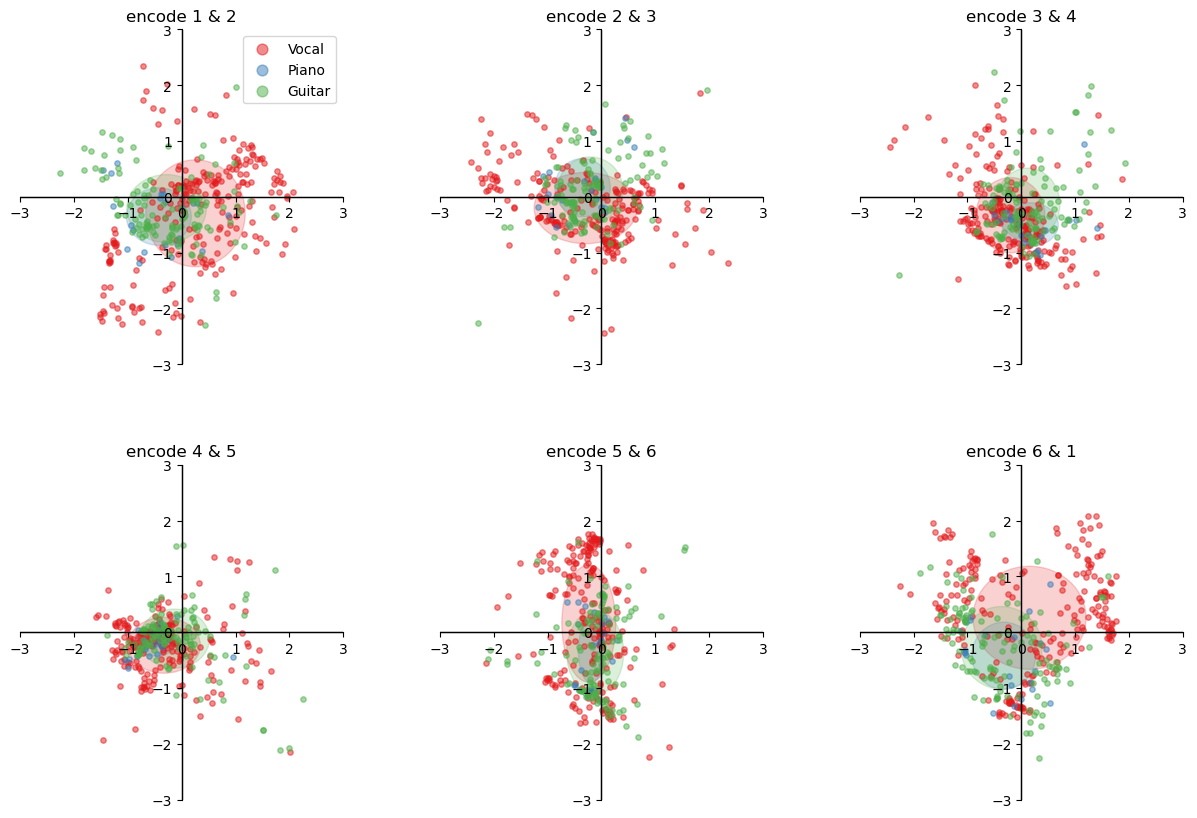

Encoded samples:
  31 x Bell
  23 x Piano
 127 x Guitar


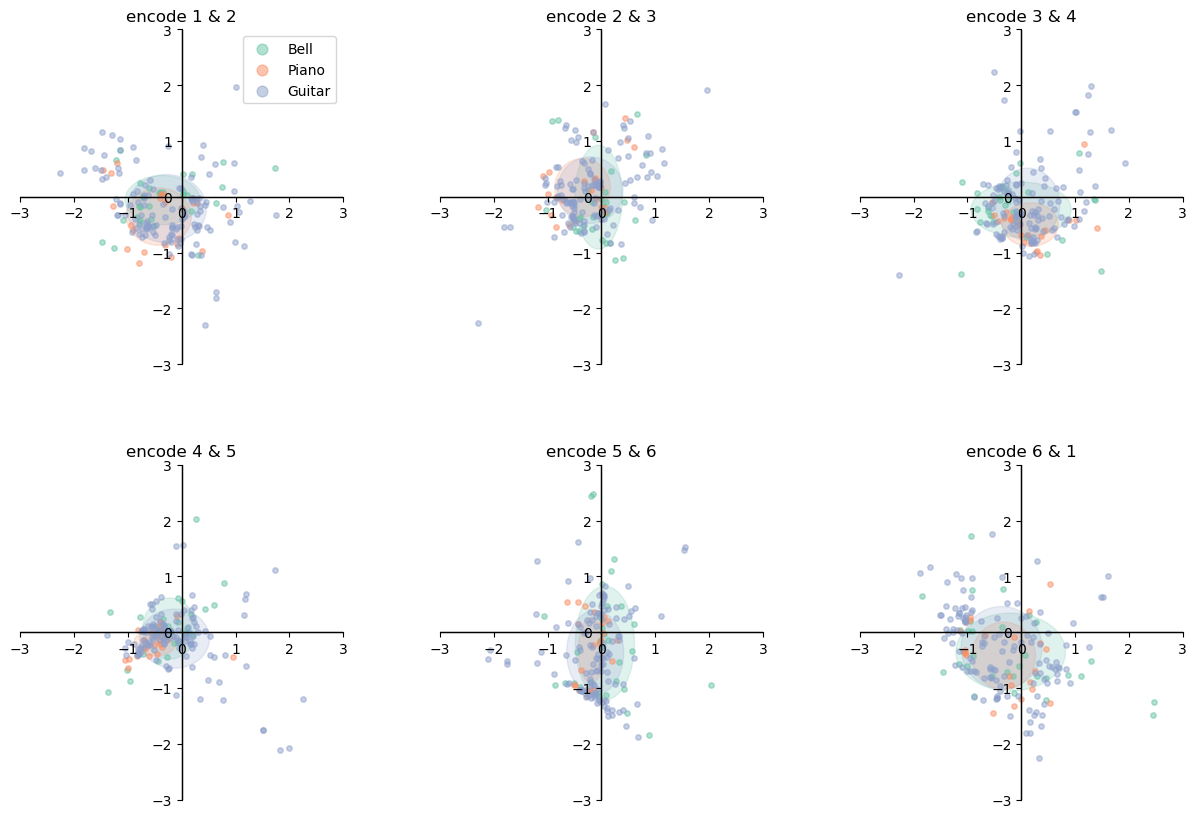

Encoded samples:
 119 x No Category
  62 x Synth Makes
  23 x Piano
  31 x Bell


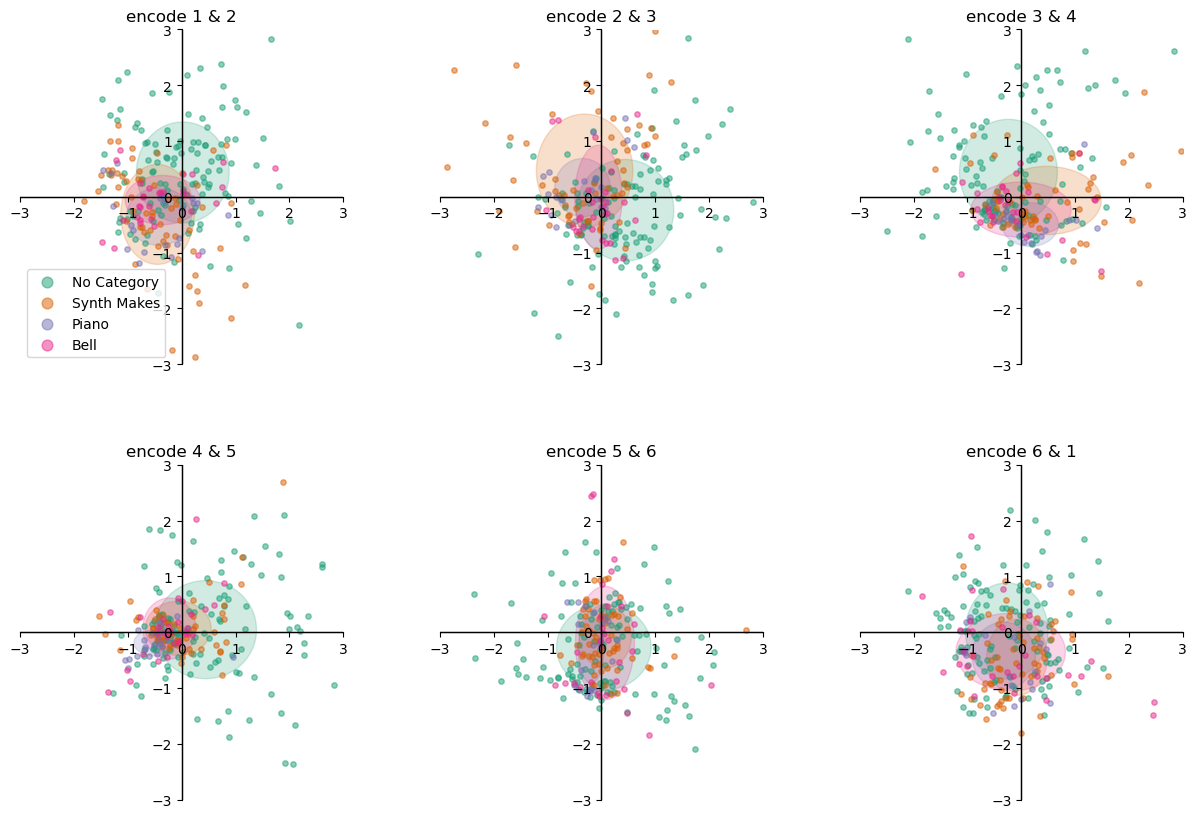

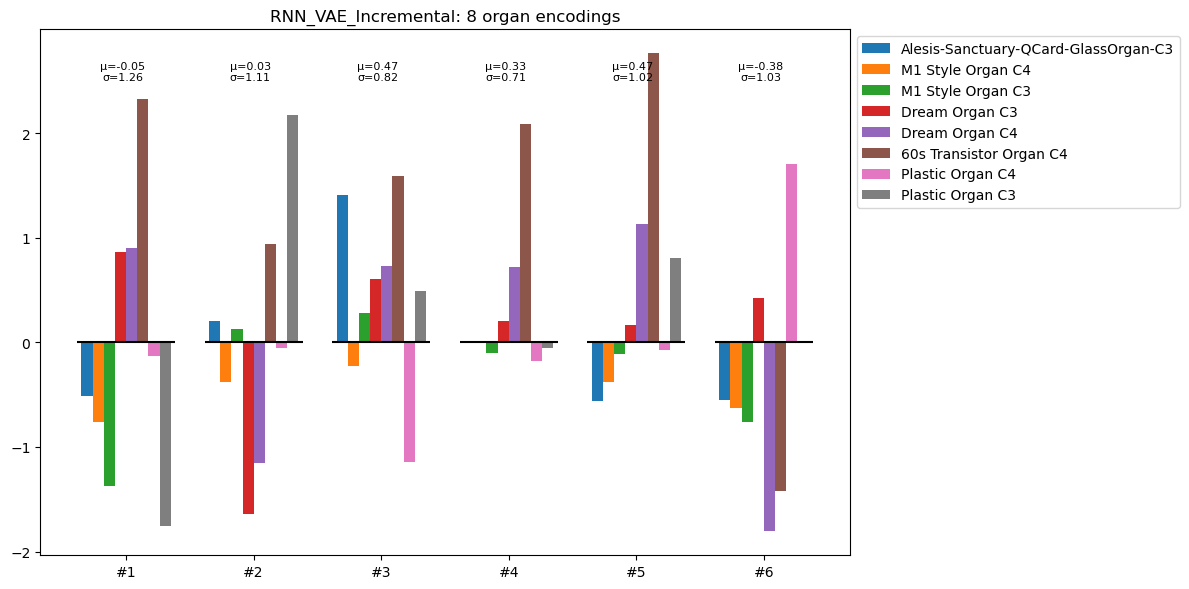

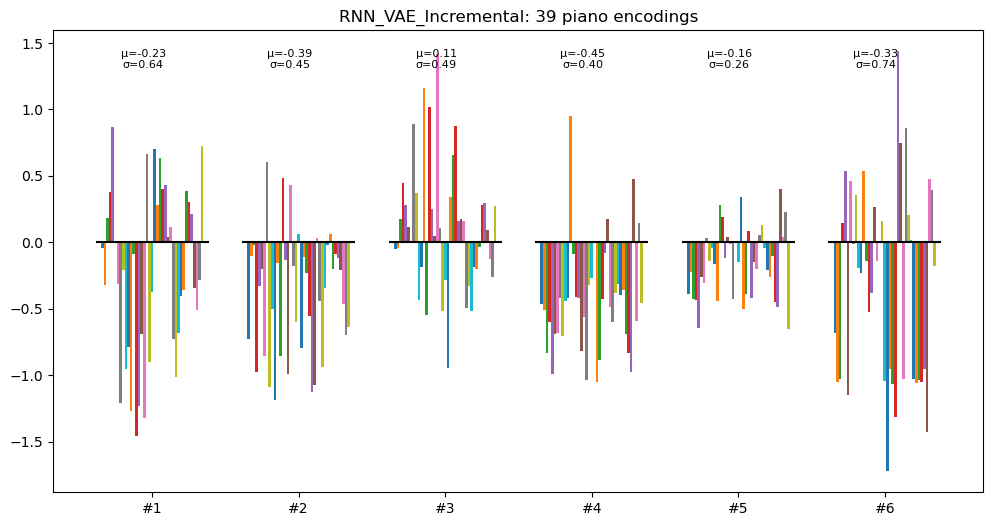

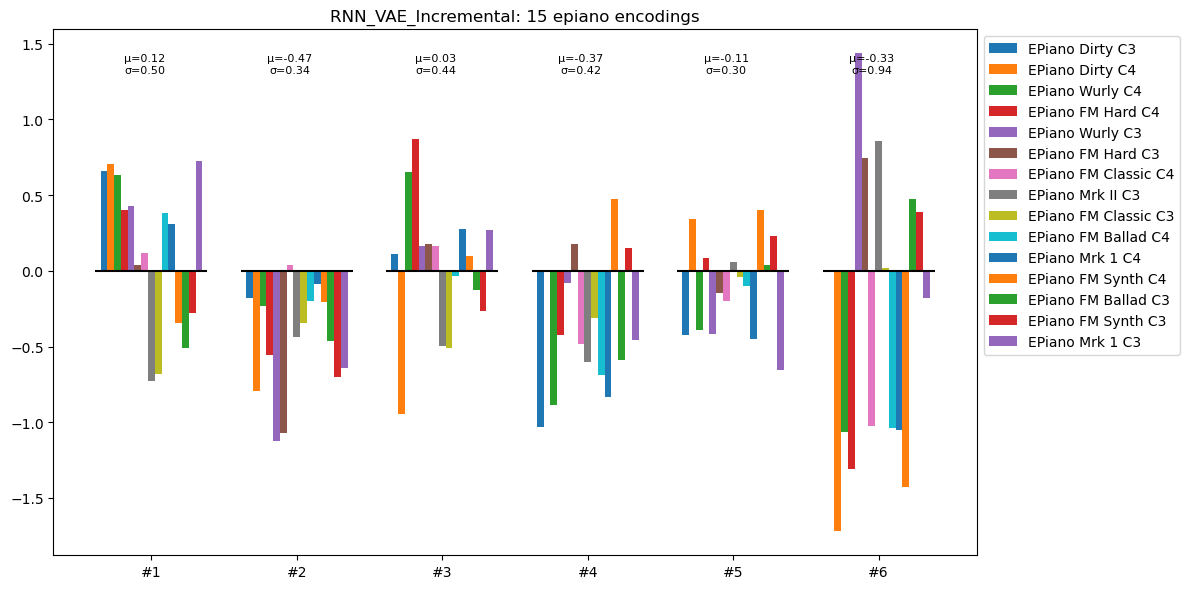

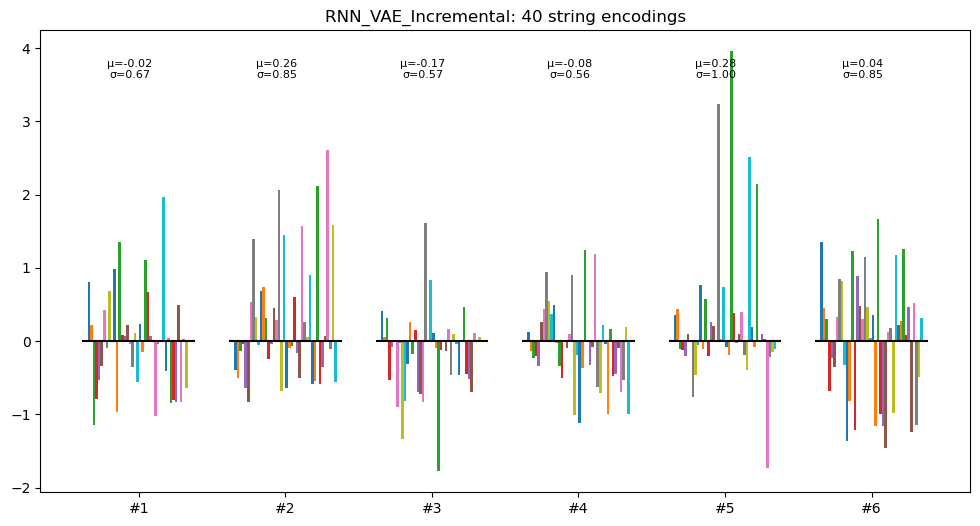

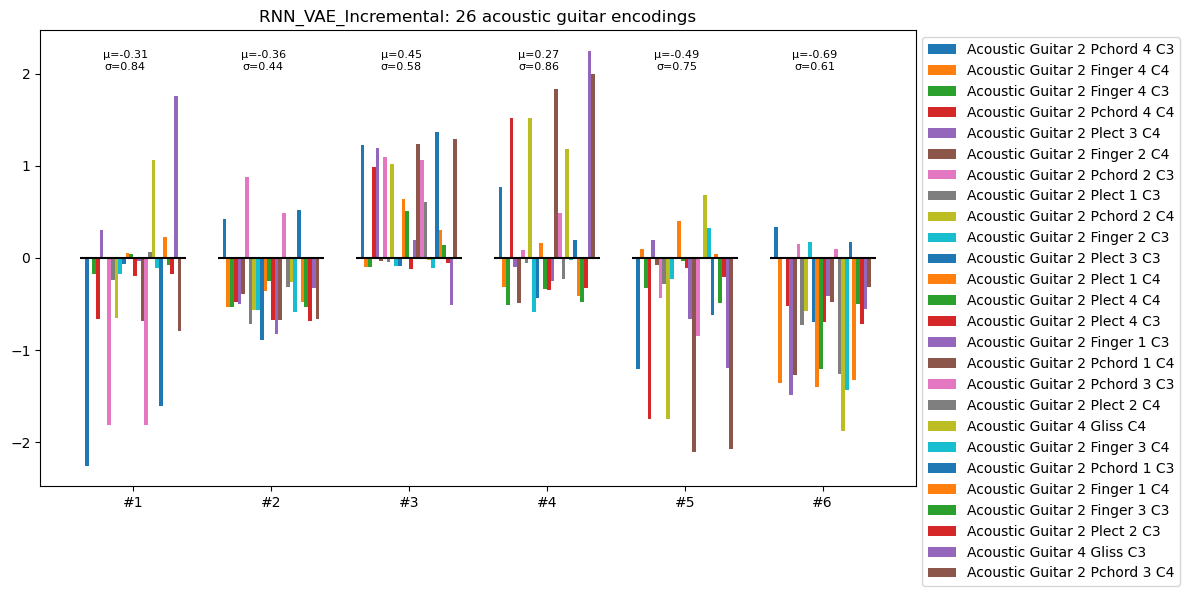

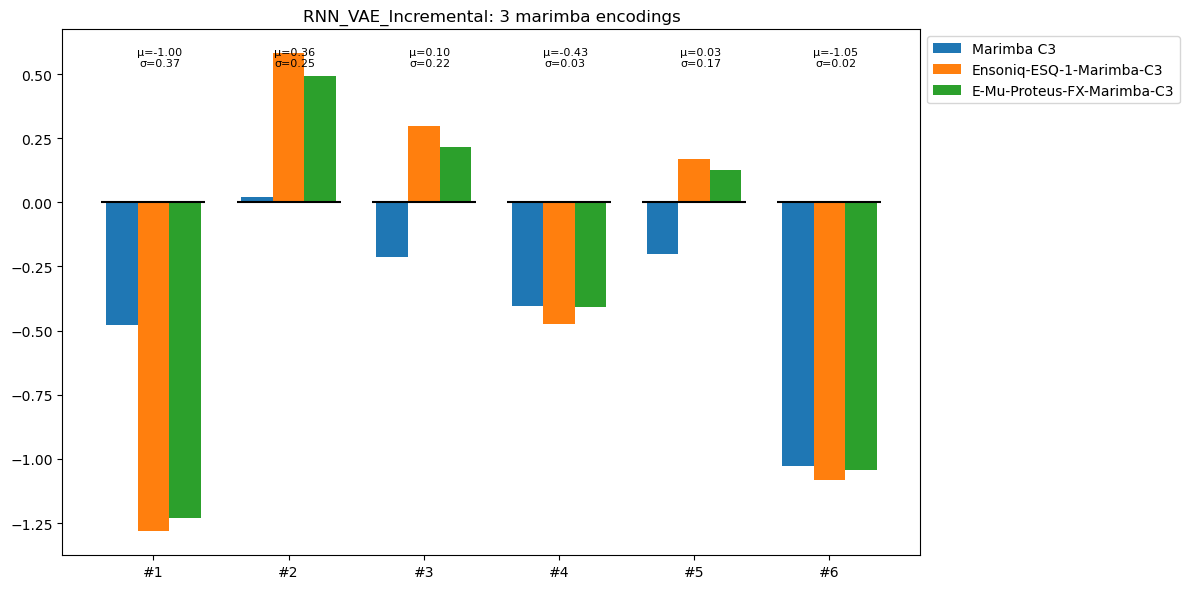

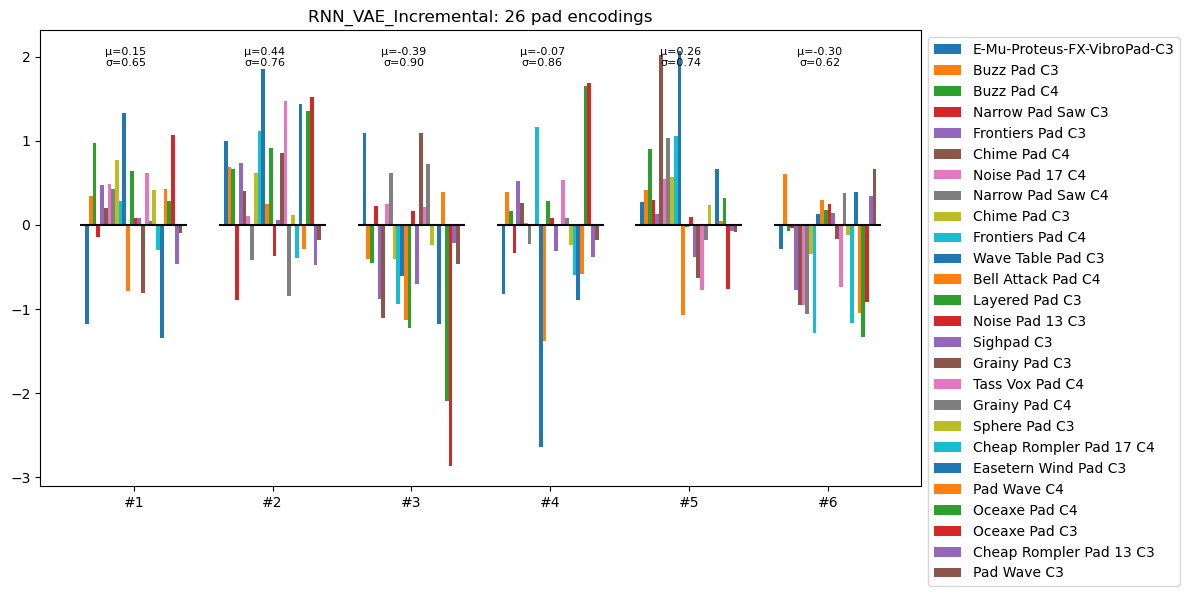

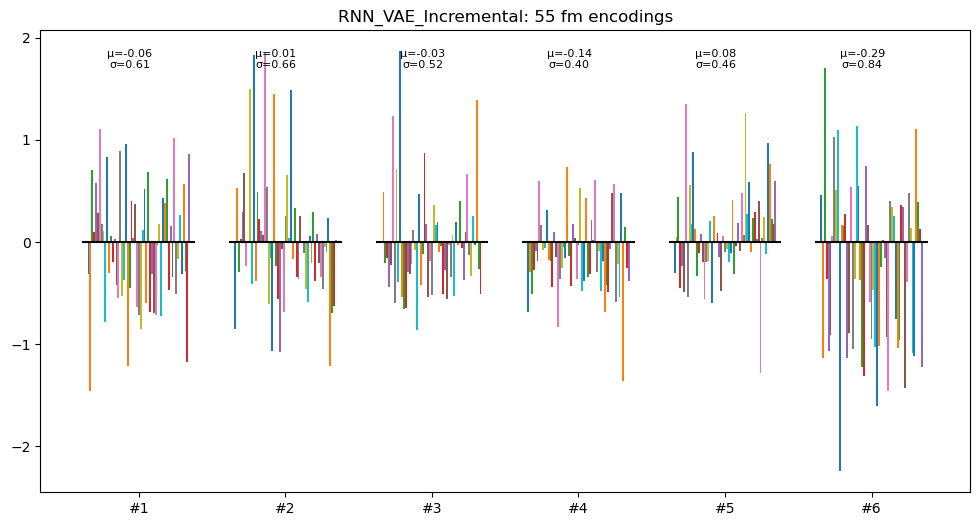

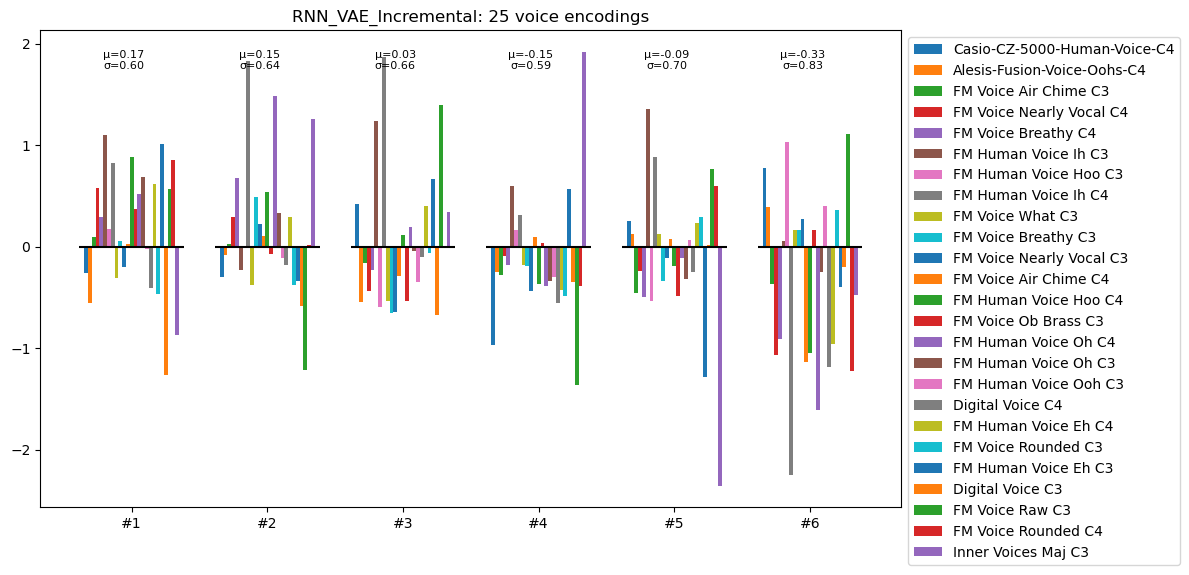

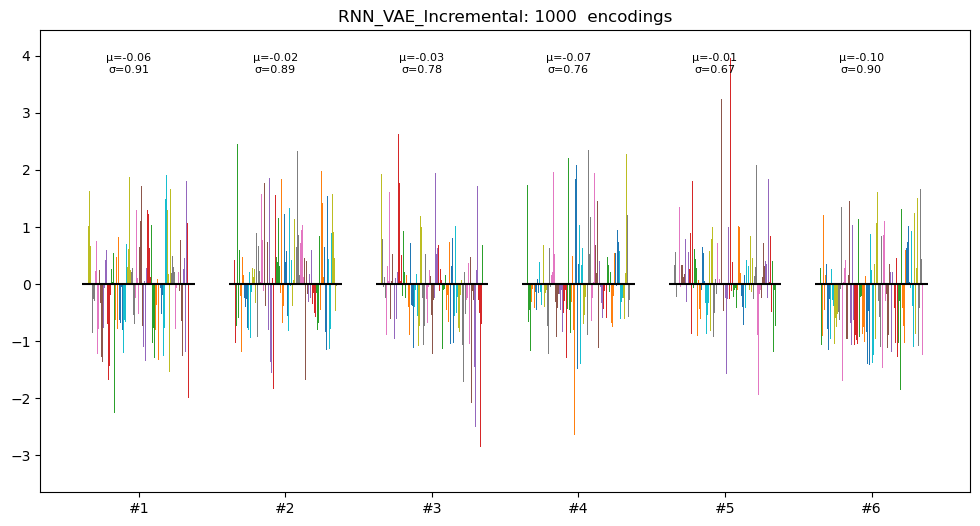

In [5]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Print some pretty pictures of the samples and their encodings
demo_encodings()

# Test the accuracy of the model: lists all samples by decreasing accuracy
#test_all()

#demo_sounds()
